<a href="https://colab.research.google.com/github/amannitjsr/Data-Analysis-using-python/blob/main/Zscore_and_percentile_outliers_cleaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#started
#Importing file 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import linear_model

from bs4 import BeautifulSoup
import requests

In [2]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/data.csv')

In [3]:
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA


In [4]:
lower_limit , upper_limit = df.price.quantile([.003,.997])

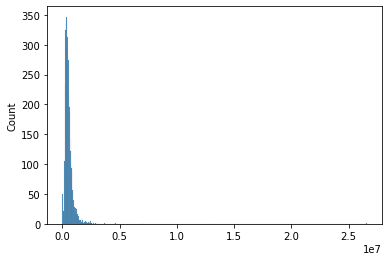

In [5]:

sns.histplot(sorted(df.price))

In [6]:
upper_limit

2684060.0000000084

In [7]:
no_percentile = df[(df.price>lower_limit) & (df.price < upper_limit)]

In [8]:
df[(df.price<lower_limit) | (df.price >upper_limit)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
252,2014-05-07 00:00:00,3200000.0,7.0,4.50,6210,8856,2.5,0,2,5,4760,1450,1910,0,1230 Warren Ave N,Seattle,WA 98109,USA
1132,2014-05-21 00:00:00,2700000.0,5.0,4.75,5305,8401,2.0,0,2,3,3745,1560,2005,0,1010 6th St W,Kirkland,WA 98033,USA
1567,2014-05-29 00:00:00,3100000.0,6.0,4.25,6980,15682,3.0,0,4,4,5330,1650,1999,0,5243 Forest Ave SE,Mercer Island,WA 98040,USA
1571,2014-05-29 00:00:00,2750000.0,4.0,3.25,4430,21000,2.0,0,0,3,4430,0,1952,2007,3239 78th Pl NE,Medina,WA 98039,USA
1637,2014-05-30 00:00:00,3710000.0,4.0,3.50,5550,28078,2.0,0,2,4,3350,2200,2000,0,3222 78th Pl NE,Medina,WA 98039,USA
2083,2014-06-08 00:00:00,2700000.0,4.0,3.25,4420,7850,2.0,1,4,3,3150,1270,2001,0,17834 SE 40th Pl,Bellevue,WA 98008,USA
2286,2014-06-11 00:00:00,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA
2328,2014-06-11 00:00:00,2888000.0,5.0,6.25,8670,64033,2.0,0,4,3,6120,2550,1965,2003,1291 NW Elford Dr,Seattle,WA 98177,USA
2654,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
2761,2014-06-18 00:00:00,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA


In [9]:
no_percentile.price

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4537, dtype: float64

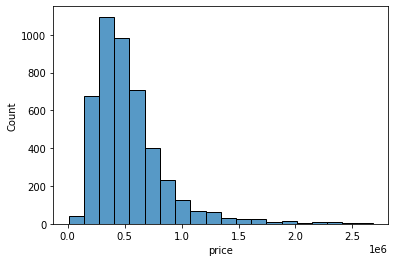

In [10]:
sns.histplot(no_percentile.price,bins=20)

In [11]:
df['Z_score']= (df.price - df.price.mean())/df.price.std()

In [12]:
df.Z_score

0      -0.423817
1       3.249245
2      -0.372384
3      -0.234046
4      -0.003481
          ...   
4595   -0.432390
4596   -0.031267
4597   -0.239536
4598   -0.618201
4599   -0.587695
Name: Z_score, Length: 4600, dtype: float64

In [13]:
df.shape

(4600, 19)

In [14]:
no_percentile.shape #more precise cheking and outliers remove 

(4537, 18)

In [15]:
#Remove outliers;
no_outliers = df[(df.Z_score > -3) & (df.Z_score < 3)]
no_outliers.shape

(4566, 19)

In [16]:
no_outliers[['city', 'price']].sample(5)

,city,price
2436,Issaquah,680000.0
4421,Bothell,425000.0
2857,Kent,120000.0
3100,Renton,470000.0
4208,Sammamish,594950.0


In [17]:
print("we have removed ",df.shape[0]-no_percentile.shape[0],"outliers by percentile/quartile method")
print("we have removed ",df.shape[0]-no_outliers.shape[0],"outliers by zscore method")
print("Use percentile method for more accurate results")

we have removed  63 outliers by percentile/quartile method
we have removed  34 outliers by zscore method
Use percentile method for more accurate results


In [18]:
# to find percentile

q1,q3 = np.percentile(df.price , [25,75])

In [19]:
#IQR Method 
#inter quartile range 
Iqr = q3 - q1
lower_limit = q1 - 1.5*Iqr
Upper_limit = q3 - 1.5*Iqr


In [20]:
df[(df.price > lower_limit) | (df.price < Upper_limit)].sample(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Z_score
2657,2014-06-17 00:00:00,640000.0,3.0,2.00,1380,4800,1.0,0,0,3,1380,0,1948,1994,3415 9th Ave W,Seattle,WA 98119,USA,0.156140
741,2014-05-15 00:00:00,689900.0,4.0,3.25,2740,7266,2.0,0,0,3,2060,680,2003,0,392 Wilderness Peak Dr NW,Issaquah,WA 98027,USA,0.244641


In [21]:
df.city.groupby((df.yr_built)).max()

yr_built
1900        Tukwila
1901        Seattle
1902        Seattle
1903        Seattle
1904        Seattle
           ...     
2010     Snoqualmie
2011        Seattle
2012     Snoqualmie
2013    Woodinville
2014     Snoqualmie
Name: city, Length: 115, dtype: object

In [22]:
df = df.fillna(df.price.median)